# Creating Regression Data

In [7]:
import pandas as pd
full_data = pd.read_csv('./joined_data_for_spec_model_training.csv',sep='\t',low_memory=False)

In [8]:
basic_patent_data = pd.read_csv('./Data/basic_patent_data_PATSTAT_IMPUTED_TARGET.csv',sep='\t',low_memory=False)

In [9]:
to_drop = set(basic_patent_data.columns) - set(['filing_date','patent_granted_date','application_number','publication_date'])

In [10]:
basic_patent_data = basic_patent_data.drop(columns=to_drop)
basic_patent_data=basic_patent_data.dropna(subset=['patent_granted_date'])

In [11]:
common_cols = set(list(basic_patent_data.columns)).intersection(set(list(full_data.columns)))

In [12]:
joined_df = pd.merge(basic_patent_data,full_data, on=list(common_cols),how='inner')

In [13]:
joined_df.columns

Index(['application_number', 'filing_date', 'patent_granted_date',
       'publication_date', 'srep_total_citations',
       'srep_patent_citation_count', 'srep_non_patent_citation_count',
       'srep_fraction_patent_citations', 'srep_citation_count_X',
       'srep_citation_count_Y', 'srep_citation_count_A',
       'srep_citation_count_D', 'srep_citation_count_E',
       'srep_citation_count_P', 'srep_citation_count_T',
       'fraction_claims_covered_by_>=1_X', 'fraction_claims_covered_by_>=2_X',
       'fraction_claims_covered_by_>=3_X', 'fraction_claims_covered_by_>=1_Y',
       'fraction_claims_covered_by_>=2_Y', 'fraction_claims_covered_by_>=3_Y',
       'fraction_claims_covered_by_>=1_A', 'fraction_claims_covered_by_>=2_A',
       'fraction_claims_covered_by_>=3_A', 'fraction_claims_covered_by_>=1_D',
       'fraction_claims_covered_by_>=2_D', 'fraction_claims_covered_by_>=3_D',
       'fraction_claims_covered_by_>=1_E', 'fraction_claims_covered_by_>=2_E',
       'fraction_clai

In [14]:
basic_patent_data

,application_number,filing_date,patent_granted_date,publication_date
0,1000269.9,20010704,20180221.0,2012-11-14
2,1104117.5,20010221,20150211.0,2013-07-31
7,1203797.4,20011008,20170607.0,2015-09-02
12,2020654.6,20020913,20191106.0,2012-10-10
16,2291638.1,20020701,20190227.0,2016-07-20
...,...,...,...,...
747850,24182508.2,20110623,20250101.0,2024-08-07
749884,24186264.8,20221202,20250319.0,2024-08-21
751534,24189266.0,20090120,20250115.0,2024-10-02
753911,24193623.6,20110105,20250319.0,2024-10-09


In [14]:
import pandas as pd

df = basic_patent_data.copy()

# Filing date — robust universal parse for numeric + string
df['filing_date'] = pd.to_datetime(df['filing_date'].astype(str), errors='coerce')

# Patent granted date — fix float to int, then parse
df['patent_granted_date'] = pd.to_datetime(
    df['patent_granted_date'].dropna().astype(float).astype(int).astype(str), errors='coerce'
)

# Publication date — standard parse
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

# Recompute differences
df_derived = pd.DataFrame({
    'application_number': df['application_number'],
    'publication_time_days': (df['publication_date'] - df['filing_date']).dt.days,
    'patent_publication_time_days': (df['patent_granted_date'] - df['publication_date']).dt.days,
    'publication_date': df['publication_date']
})

print(df_derived.head())


    application_number  publication_time_days  patent_publication_time_days  \
0            1000269.9                   4151                          1925   
2            1104117.5                   4543                           560   
7            1203797.4                   5077                           644   
12           2020654.6                   3680                          2583   
16           2291638.1                   5133                           952   

   publication_date  
0        2012-11-14  
2        2013-07-31  
7        2015-09-02  
12       2012-10-10  
16       2016-07-20  


In [99]:
df_derived

,application_number,publication_time_days,patent_publication_time_days
0,1000269.9,4151,1925
2,1104117.5,4543,560
7,1203797.4,5077,644
12,2020654.6,3680,2583
16,2291638.1,5133,952
...,...,...,...
747850,24182508.2,4794,147
749884,24186264.8,628,210
751534,24189266.0,5734,105
753911,24193623.6,5026,161


In [17]:
joined_final_df = pd.merge(joined_df,df_derived,on='application_number',how='inner')

In [18]:
joined_final_df.columns

Index(['application_number', 'filing_date', 'patent_granted_date',
       'publication_date', 'srep_total_citations',
       'srep_patent_citation_count', 'srep_non_patent_citation_count',
       'srep_fraction_patent_citations', 'srep_citation_count_X',
       'srep_citation_count_Y', 'srep_citation_count_A',
       'srep_citation_count_D', 'srep_citation_count_E',
       'srep_citation_count_P', 'srep_citation_count_T',
       'fraction_claims_covered_by_>=1_X', 'fraction_claims_covered_by_>=2_X',
       'fraction_claims_covered_by_>=3_X', 'fraction_claims_covered_by_>=1_Y',
       'fraction_claims_covered_by_>=2_Y', 'fraction_claims_covered_by_>=3_Y',
       'fraction_claims_covered_by_>=1_A', 'fraction_claims_covered_by_>=2_A',
       'fraction_claims_covered_by_>=3_A', 'fraction_claims_covered_by_>=1_D',
       'fraction_claims_covered_by_>=2_D', 'fraction_claims_covered_by_>=3_D',
       'fraction_claims_covered_by_>=1_E', 'fraction_claims_covered_by_>=2_E',
       'fraction_clai

## Summary Statistics generation

### INdustry summary statistics

In [13]:
industry_data = pd.read_csv('./Data/full_data_mapped_industries_all_standards_all_levels_top_2_FILLED.csv',sep='\t',low_memory=False)

In [14]:
industry_data_for_deriving_regression_summary_characteristics = pd.merge(df_derived,industry_data, on='application_number',how='inner')

In [16]:
basic_patent_data.drop(columns = ['filing_date', 'patent_granted_date'],inplace=True)

In [18]:
industry_data_for_deriving_regression_summary_characteristics_final = pd.merge(industry_data_for_deriving_regression_summary_characteristics,basic_patent_data, on='application_number',how='inner')

In [22]:
industry_data_for_deriving_regression_summary_characteristics_final.columns

Index(['application_number', 'publication_time_days',
       'patent_publication_time_days', 'top1_isic_rev4_1', 'top2_isic_rev4_1',
       'top1_isic_rev4_1_excl_service', 'top2_isic_rev4_1_excl_service',
       'top1_isic_rev4_2', 'top2_isic_rev4_2', 'top1_isic_rev4_2_excl_service',
       'top2_isic_rev4_2_excl_service', 'top1_isic_rev4_3', 'top2_isic_rev4_3',
       'top1_isic_rev4_3_excl_service', 'top2_isic_rev4_3_excl_service',
       'top1_isic_rev4_4', 'top2_isic_rev4_4', 'top1_isic_rev4_4_excl_service',
       'top2_isic_rev4_4_excl_service', 'top1_sitc_rev4_1', 'top2_sitc_rev4_1',
       'top1_sitc_rev4_2', 'top2_sitc_rev4_2', 'top1_sitc_rev4_3',
       'top2_sitc_rev4_3', 'top1_sitc_rev4_4', 'top2_sitc_rev4_4',
       'top1_sitc_rev4_45', 'top2_sitc_rev4_45', 'top1_naics07_1',
       'top2_naics07_1', 'top1_naics07_1_excl_service',
       'top2_naics07_1_excl_service', 'top1_naics07_2', 'top2_naics07_2',
       'top1_naics07_2_excl_service', 'top2_naics07_2_excl_service',
 

In [24]:
industry_data_for_deriving_regression_summary_characteristics_final = (
    industry_data_for_deriving_regression_summary_characteristics_final
    .loc[:, ~industry_data_for_deriving_regression_summary_characteristics_final.columns.str.startswith('top2')]
)


In [26]:
industry_data_for_deriving_regression_summary_characteristics_final.columns

Index(['application_number', 'publication_time_days',
       'patent_publication_time_days', 'top1_isic_rev4_1',
       'top1_isic_rev4_1_excl_service', 'top1_isic_rev4_2',
       'top1_isic_rev4_2_excl_service', 'top1_isic_rev4_3',
       'top1_isic_rev4_3_excl_service', 'top1_isic_rev4_4',
       'top1_isic_rev4_4_excl_service', 'top1_sitc_rev4_1', 'top1_sitc_rev4_2',
       'top1_sitc_rev4_3', 'top1_sitc_rev4_4', 'top1_sitc_rev4_45',
       'top1_naics07_1', 'top1_naics07_1_excl_service', 'top1_naics07_2',
       'top1_naics07_2_excl_service', 'top1_naics07_3',
       'top1_naics07_3_excl_service', 'top1_naics07_4',
       'top1_naics07_4_excl_service', 'top1_naics07_5',
       'top1_naics07_5_excl_service', 'top1_naics07_6',
       'top1_naics07_6_excl_service', 'top1_hs2007_1', 'top1_hs2007_2',
       'top1_hs2007_3', 'top1_hs2007_4', 'top1_hs2007_5', 'top1_hs2007_6',
       'publication_date'],
      dtype='object')

In [29]:
# ────────────────────────────────────────────────────────────────
#  regression-summary helpers
# ────────────────────────────────────────────────────────────────
import os
import numpy as np
import pandas as pd
from typing import List

REG_SUMMARY_DIR = "./Data/regression_summary_characteristics"
os.makedirs(REG_SUMMARY_DIR, exist_ok=True)

# ----------------------------------------------------------------
def _make_col_name(stat: str,
                   cls_col: str,
                   interval: str,
                   unit: str) -> str:
    """
    Build the final column name, stripping the 'top1_' prefix.
    Example →  avg_isic_rev4_1_publication_time_days
    """
    industry_part = cls_col.replace("top1_", "")
    return f"{stat}_{industry_part}_{interval}_{unit}"


# ----------------------------------------------------------------
#  replacement for the old _compute_group_statistics
# ----------------------------------------------------------------
# ----------------------------------------------------------------
#  REPLACEMENT: keep *days* only  (mean / min / max)
# ----------------------------------------------------------------
# ----------------------------------------------------------------
#  UPDATED: uses the *pre-computed* timing columns in the dataframe
# ----------------------------------------------------------------
def _compute_group_statistics(df_cut: pd.DataFrame,
                              cls_col: str) -> pd.DataFrame:
    """
    For one classification column, return a DataFrame (index = class code)
    with 6 features, all in *days*:

        mean/min/max publication_time_days              →  *_publication_time_days
        mean/min/max patent_publication_time_days       →  *_patenting_time_days
    """
    # Build a compact working frame
    tmp = df_cut[[cls_col,               # keep the class value
                  "publication_time_days",
                  "patent_publication_time_days"]].copy()

    # Aggregate: each timing column → ['mean', 'min', 'max']
    grouped = (
        tmp.groupby(cls_col, sort=False)[["publication_time_days",
                                          "patent_publication_time_days"]]
            .agg(["mean", "min", "max"])
    )

    # Flatten MultiIndex & rename to the requested spec
    new_cols = []
    for base_col, stat in grouped.columns:        # ('publication_time_days', 'mean'), …
        interval = ("publication_time"
                    if base_col == "publication_time_days"
                    else "patenting_time")
        new_cols.append(_make_col_name(stat, cls_col, interval, "days"))

    grouped.columns = new_cols
    return grouped




def generate_regression_summary_characteristics(
    df: pd.DataFrame,
    cutoff_years: List[int] = [2015, 2016, 2017, 2018, 2019],
) -> None:
    """
    Derive regression-oriented timing summaries for every *top1_* class column
    and save one TSV per cut-off year (Option B layout).

    Each output row corresponds to a single application_number and contains:
        - application_number
        - 18 × N_class_columns timing features
    """
    if not pd.api.types.is_datetime64_any_dtype(df["publication_date"]):
        df["publication_date"] = pd.to_datetime(df["publication_date"])

    # all classification columns
    cls_cols = [c for c in df.columns if c.startswith("top1_")]
    base_cols = ["application_number"]

    for yr in cutoff_years:
        print(f"\n▶︎ Building regression-summary features up to {yr}…")
        df_cut = df.loc[df["publication_date"].dt.year <= yr].copy()

        # dictionary to accumulate per-class stats for all cls_cols
        stats_per_col = {}

        for cls_col in cls_cols:
            print(f"  • aggregating {cls_col} …")
            stats_per_col[cls_col] = _compute_group_statistics(df_cut, cls_col)

        # ------------------------------------------------------------
        #  Map the stats back onto *all* rows (Option B)
        # ------------------------------------------------------------
        feat_dfs = [df[base_cols].copy()]  # start with application_number only

        for cls_col, grp_stats in stats_per_col.items():
            # map class → stats; unseen classes → NaN → fill 0
            mapped = df[[cls_col]].join(grp_stats, on=cls_col).drop(columns=[cls_col])
            mapped = mapped.fillna(0).astype(np.float32)   # memory-frugal
            feat_dfs.append(mapped)

        summary_df = pd.concat(feat_dfs, axis=1)

        # ------------------------------------------------------------
        #  Save to disk
        # ------------------------------------------------------------
        out_file = os.path.join(
            REG_SUMMARY_DIR,
            f"regression_summary_characteristics_cutoff_{yr}.csv"
        )
        summary_df.to_csv(out_file, sep="\t", index=False)
        print(f"    ↳ saved {out_file}  [{summary_df.shape[0]} rows × {summary_df.shape[1]-1} features]")

# ----------------------------------------------------------------
# USAGE EXAMPLE
# ----------------------------------------------------------------
# df = pd.read_csv("your_input_dataframe.tsv", sep="\t", parse_dates=[
#     "filing_date", "publication_date", "patent_granted_date"])
# generate_regression_summary_characteristics(df)


In [31]:
generate_regression_summary_characteristics(industry_data_for_deriving_regression_summary_characteristics_final)

/tmp/ipykernel_42341/799205560.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["publication_date"] = pd.to_datetime(df["publication_date"])



▶︎ Building regression-summary features up to 2015…
  • aggregating top1_isic_rev4_1 …
  • aggregating top1_isic_rev4_1_excl_service …
  • aggregating top1_isic_rev4_2 …
  • aggregating top1_isic_rev4_2_excl_service …
  • aggregating top1_isic_rev4_3 …
  • aggregating top1_isic_rev4_3_excl_service …
  • aggregating top1_isic_rev4_4 …
  • aggregating top1_isic_rev4_4_excl_service …
  • aggregating top1_sitc_rev4_1 …
  • aggregating top1_sitc_rev4_2 …
  • aggregating top1_sitc_rev4_3 …
  • aggregating top1_sitc_rev4_4 …
  • aggregating top1_sitc_rev4_45 …
  • aggregating top1_naics07_1 …
  • aggregating top1_naics07_1_excl_service …
  • aggregating top1_naics07_2 …
  • aggregating top1_naics07_2_excl_service …
  • aggregating top1_naics07_3 …
  • aggregating top1_naics07_3_excl_service …
  • aggregating top1_naics07_4 …
  • aggregating top1_naics07_4_excl_service …
  • aggregating top1_naics07_5 …
  • aggregating top1_naics07_5_excl_service …
  • aggregating top1_naics07_6 …
  • aggrega

### Parties summary statistics

In [46]:
patent_data_names_ts = pd.read_csv('./Data/basic_patent_data_added_context_for_attorneys.csv',sep='\t',low_memory=False)


In [47]:
patent_data_names_ts.columns

Index(['Unnamed: 0', 'application_number', 'applicant_names', 'inventor_names',
       'representative_name', 'patent_granted', 'publication_date',
       'application_status_target', 'value_imputed',
       'publication_date_date_time', 'publication_year', 'company_url',
       'is_inhouse_flag', 'is_company'],
      dtype='object')

In [48]:
to_keep =['application_number','applicant_names','representative_name','application_status_target','company_url','is_inhouse_flag','is_company','publication_date']

In [49]:
to_drop = list(set(patent_data_names_ts.columns) - set(to_keep))

In [50]:
patent_data_names_ts.drop(columns = to_drop,inplace=True)

In [51]:
patent_data_names_ts

,application_number,applicant_names,representative_name,publication_date,application_status_target,company_url,is_inhouse_flag,is_company
0,1000269.9,['Texas Instruments Incorporated'],"Holt, Michael",2012-11-14,1,NaN,True,False
1,1000275.6,['Texas Instruments Incorporated'],"Holt, Michael",2012-12-19,-1,NaN,True,False
2,1104117.5,['Tyco Electronics AMP Espanola S.A.'],"Heinz-Schäfer, Marion",2013-07-31,1,NaN,True,False
3,1112256.1,['YAMAHA CORPORATION'],"Geyer, Ulrich F.",2014-07-30,-1,NaN,True,False
4,1118868.7,['Avocent Redmond Corp.'],"Tranter, Andrew David",2014-11-12,-1,NaN,True,False
...,...,...,...,...,...,...,...,...
760103,25154369.0,['Tecan Trading AG'],Sykora & König Patentanwälte PartG mbB,2025-03-12,0,NaN,True,False
760104,25155232.9,"['Mavenir Systems, Inc.']",Studio Torta S.p.A.,2025-03-26,0,https://www.studiotorta.com,False,True
760105,25155242.8,['Solventum Intellectual Properties Company'],Simmons & Simmons,2025-03-26,0,NaN,True,False
760106,25155623.9,['nChain Licensing AG'],Page White Farrer,2025-03-19,0,https://www.pagewhite.com,False,True


In [60]:
joined_for_deriving_parties_summary_regression = pd.merge(patent_data_names_ts,df_derived,on='application_number',how='inner')

import ast

joined_for_deriving_parties_summary_regression['applicant_names'] = (
    joined_for_deriving_parties_summary_regression['applicant_names']
    .apply(ast.literal_eval)
)

In [77]:
joined_for_deriving_parties_summary_regression.columns

Index(['application_number', 'applicant_names', 'representative_name',
       'publication_date', 'application_status_target', 'company_url',
       'is_inhouse_flag', 'is_company', 'publication_time_days',
       'patent_publication_time_days'],
      dtype='object')

In [87]:
# ──────────────────────────────────────────────────────────────
#  regression-parties time summaries  (final, per-application)
# ──────────────────────────────────────────────────────────────
import os
from pathlib import Path
from typing import Dict

import numpy as np
import pandas as pd

DATA_DIR    = Path("./Data")
PARTIES_DIR = DATA_DIR / "regression_parties_summary"
PARTIES_DIR.mkdir(parents=True, exist_ok=True)

TIME_COLS = ["publication_time_days", "patent_publication_time_days"]

# ──────────────────────────────────────────────────────────────
#  tiny helper
# ──────────────────────────────────────────────────────────────
def _summarise_by(df: pd.DataFrame, group_col: str) -> pd.DataFrame:
    """
    min / max / mean for TIME_COLS over *group_col*, flattened.
    """
    out = (
        df.groupby(group_col, dropna=False)[TIME_COLS]
          .agg(["min", "max", "mean"])
    )
    out.columns = [f"{base}_{stat}" for base, stat in out.columns]
    return out.reset_index()


# ──────────────────────────────────────────────────────────────
#  MAIN GENERATOR  (⇦ copy / paste this)
# ──────────────────────────────────────────────────────────────
def build_parties_time_feature_matrix(
    df: pd.DataFrame,
    cutoff_year: int,
    save: bool = True,
) -> pd.DataFrame:
    """
    1.  Compute party-level stats on data with publication_date ≤ cutoff_year
    2.  Join those stats back onto *all* application_numbers
        → leakage-safe: the model sees only past info, but features exist for
          every row (even future ones).
    3.  Return / optionally save the ready-to-use feature matrix:
            application_number | rep_… | company_… | applicants_…
    """
    df = df.copy()
    df["publication_date"] = pd.to_datetime(df["publication_date"], errors="coerce")

    # ── 1) TRAIN-SIDE SLICE (statistics only) ──────────────────────────────
    df_cut = df[df["publication_date"].dt.year.le(cutoff_year)]

    # representative stats
    rep_stats = _summarise_by(df_cut, "representative_name").rename(
        columns=lambda c: f"rep_{c}" if c != "representative_name" else c
    )

    # company stats  (NaN key kept, stats→0)
    company_stats = _summarise_by(df_cut, "company_url").rename(
        columns=lambda c: f"company_{c}" if c != "company_url" else c
    )
    num_cols = company_stats.columns.difference(["company_url"])
    company_stats.loc[company_stats["company_url"].isna(), num_cols] = 0

    # applicant-level & per-patent aggregation
    df_long = (
        df_cut[["application_number", "applicant_names"] + TIME_COLS]
          .explode("applicant_names", ignore_index=True)
    )
    appl_stats = _summarise_by(df_long, "applicant_names").rename(
        columns=lambda c: f"{c}_app" if c != "applicant_names" else c
    )
    df_long = df_long.merge(appl_stats, on="applicant_names", how="left")

    appl_cols = [c for c in df_long.columns if c.endswith("_app")]
    patent_appl_stats = (
        df_long.groupby("application_number")[appl_cols]
               .mean()
               .add_prefix("applicants_")
               .reset_index()
    )

    # ── 2) BUILD THE FINAL FEATURE MATRIX (all rows) ───────────────────────
    base = (
        df[["application_number", "representative_name", "company_url"]]
          .drop_duplicates("application_number")
    )
    final_matrix = (
        base
        .merge(rep_stats,      on="representative_name", how="left")
        .merge(company_stats,  on="company_url",         how="left")
        .merge(patent_appl_stats, on="application_number", how="left")
        .drop(columns=["representative_name", "company_url"])
    )

    # ── 2c) fill NaNs produced by missing stats ───────────────────────────
    num_cols = final_matrix.columns.difference(["application_number"])
    final_matrix[num_cols] = final_matrix[num_cols].fillna(0)

    # ── 3) SAVE (optional) ────────────────────────────────────────────────
    if save:
        fname = PARTIES_DIR / f"parties_time_features_cutoff_{cutoff_year}.csv"
        final_matrix.to_csv(fname, index=False)
        # nicer print without fragile relative_to()
        print(f"★ saved → {fname}")

    return final_matrix



# ──────────────────────────────────────────────────────────────
#  CONVENIENCE LOOP   (generate 2015-2019 in one go)
# ──────────────────────────────────────────────────────────────
def build_for_year_range(df: pd.DataFrame, start: int, end: int) -> None:
    for yr in range(start, end + 1):
        print(f"▶︎ building feature matrix (cutoff ≤ {yr})")
        build_parties_time_feature_matrix(df, yr, save=True)


In [88]:
build_for_year_range(joined_for_deriving_parties_summary_regression, 2015, 2019)

▶︎ building feature matrix (cutoff ≤ 2015)
★ saved → Data/regression_parties_summary/parties_time_features_cutoff_2015.csv
▶︎ building feature matrix (cutoff ≤ 2016)
★ saved → Data/regression_parties_summary/parties_time_features_cutoff_2016.csv
▶︎ building feature matrix (cutoff ≤ 2017)
★ saved → Data/regression_parties_summary/parties_time_features_cutoff_2017.csv
▶︎ building feature matrix (cutoff ≤ 2018)
★ saved → Data/regression_parties_summary/parties_time_features_cutoff_2018.csv
▶︎ building feature matrix (cutoff ≤ 2019)
★ saved → Data/regression_parties_summary/parties_time_features_cutoff_2019.csv


# Regression Data Analisys

In [6]:
joined_final_df.columns

NameError: name 'joined_final_df' is not defined

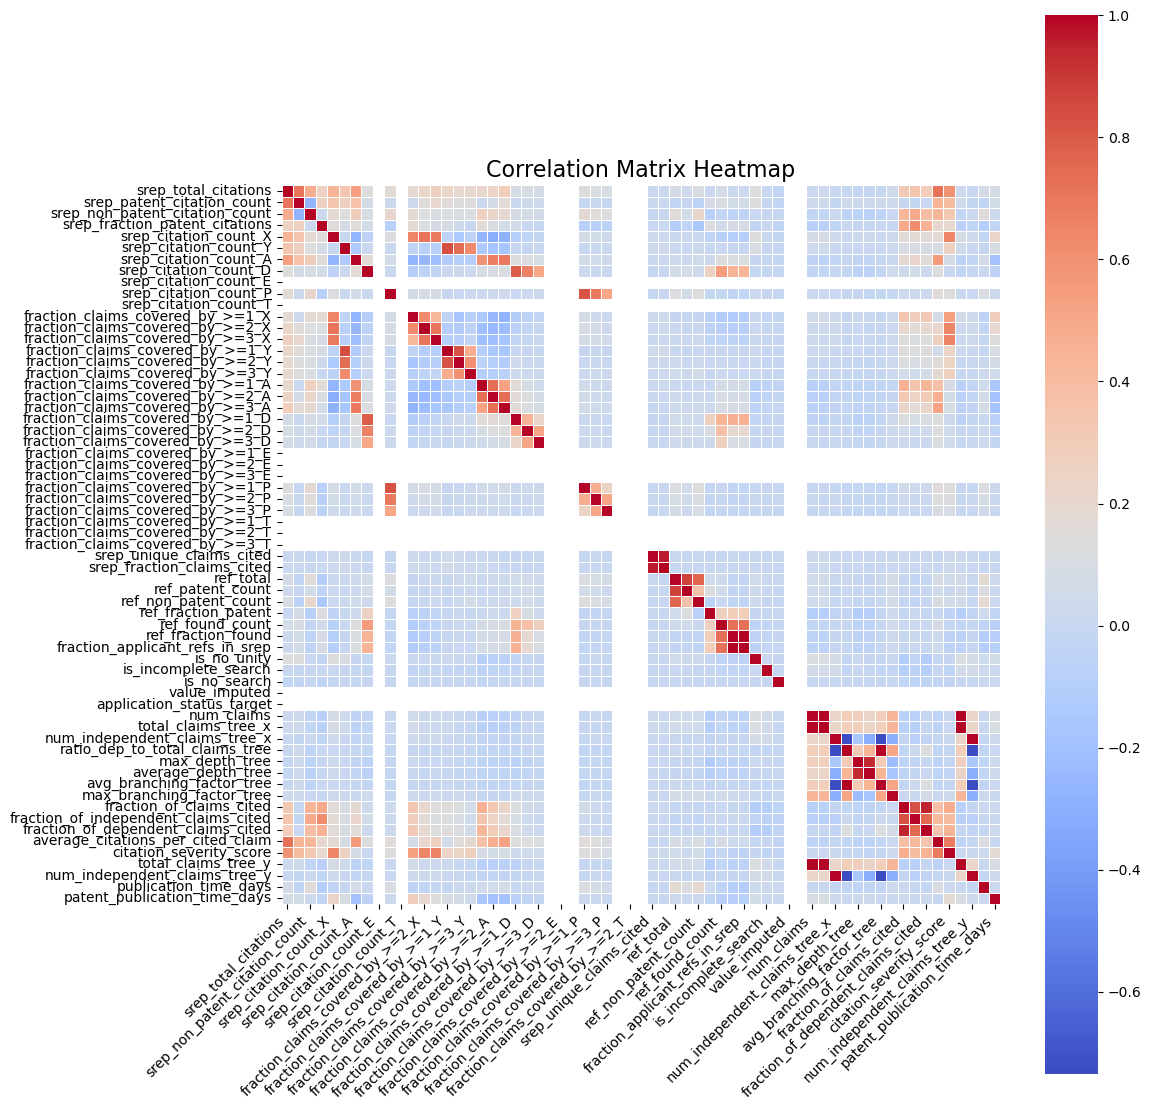

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume your DataFrame is named df
df = joined_final_df.copy()
df.drop(columns = ['application_number','filing_date','publication_date','patent_granted_date'],inplace=True)
# 1️⃣ Compute the correlation matrix
corr_matrix = df.corr()

# 2️⃣ Set up the matplotlib figure
plt.figure(figsize=(12, 12))

# 3️⃣ Draw the heatmap with Seaborn
sns.heatmap(
    corr_matrix,
    fmt=".2f",            # format to 2 decimal places
    cmap="coolwarm",      # color palette
    cbar=True,            # show color bar
    square=True,          # square cells
    linewidths=.5,        # lines between squares
    annot_kws={"size": 8} # font size for annotations
)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
industry_summary_data_example = pd.read_csv('./Data/regression_summary_characteristics/regression_summary_characteristics_cutoff_2019.csv',sep='\t')

In [4]:
list(industry_summary_data_example.columns)

['application_number',
 'mean_isic_rev4_1_publication_time_days',
 'min_isic_rev4_1_publication_time_days',
 'max_isic_rev4_1_publication_time_days',
 'mean_isic_rev4_1_patenting_time_days',
 'min_isic_rev4_1_patenting_time_days',
 'max_isic_rev4_1_patenting_time_days',
 'mean_isic_rev4_1_excl_service_publication_time_days',
 'min_isic_rev4_1_excl_service_publication_time_days',
 'max_isic_rev4_1_excl_service_publication_time_days',
 'mean_isic_rev4_1_excl_service_patenting_time_days',
 'min_isic_rev4_1_excl_service_patenting_time_days',
 'max_isic_rev4_1_excl_service_patenting_time_days',
 'mean_isic_rev4_2_publication_time_days',
 'min_isic_rev4_2_publication_time_days',
 'max_isic_rev4_2_publication_time_days',
 'mean_isic_rev4_2_patenting_time_days',
 'min_isic_rev4_2_patenting_time_days',
 'max_isic_rev4_2_patenting_time_days',
 'mean_isic_rev4_2_excl_service_publication_time_days',
 'min_isic_rev4_2_excl_service_publication_time_days',
 'max_isic_rev4_2_excl_service_publication_t

In [30]:
joined_industry_example = pd.merge(industry_summary_data_example,df_derived,on='application_number',how='inner')

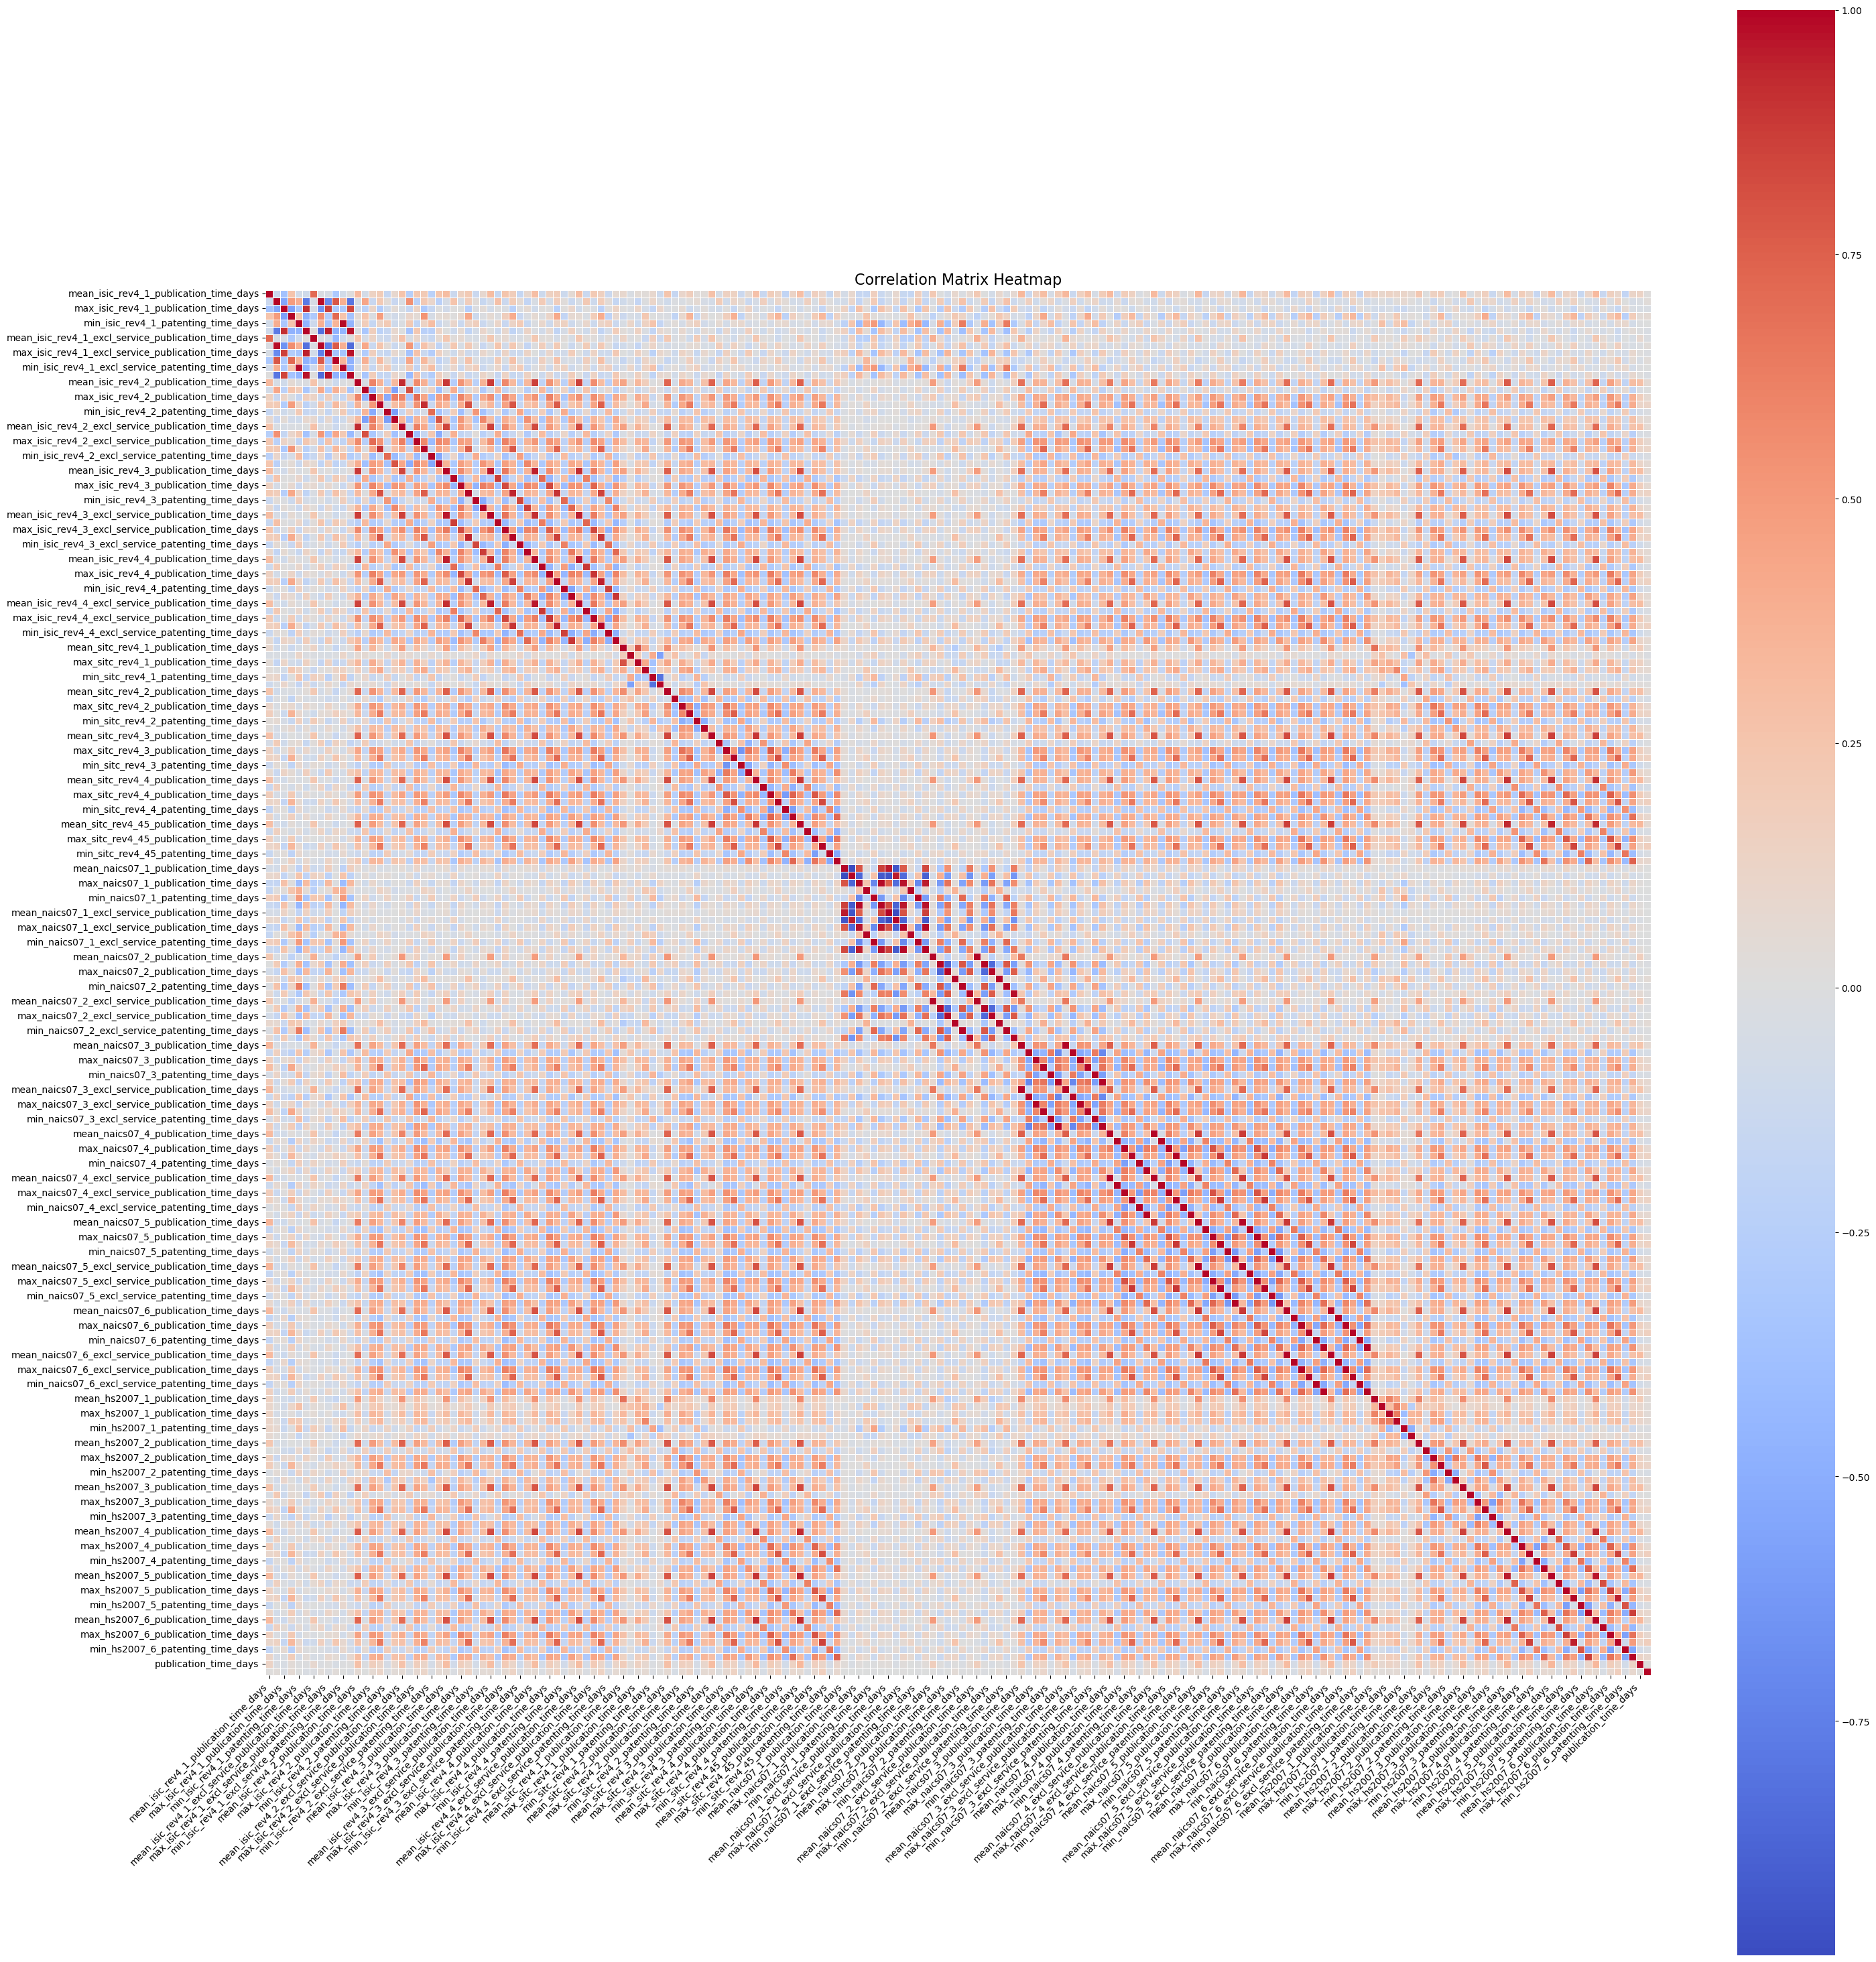

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume your DataFrame is named df
df = joined_industry_example.copy()
df.drop(columns = ['application_number'],inplace=True)
# 1️⃣ Compute the correlation matrix
corr_matrix = df.corr()

# 2️⃣ Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# 3️⃣ Draw the heatmap with Seaborn
sns.heatmap(
    corr_matrix,
    fmt=".2f",            # format to 2 decimal places
    cmap="coolwarm",      # color palette
    cbar=True,            # show color bar
    square=True,          # square cells
    linewidths=.5,        # lines between squares
    annot_kws={"size": 8} # font size for annotations
)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [109]:
parties_reg_sum_data = pd.read_csv('./Data/regression_parties_summary/parties_time_features_cutoff_2015.csv')

In [110]:
df_derived

,application_number,publication_time_days,patent_publication_time_days
0,1000269.9,4151,1925
2,1104117.5,4543,560
7,1203797.4,5077,644
12,2020654.6,3680,2583
16,2291638.1,5133,952
...,...,...,...
747850,24182508.2,4794,147
749884,24186264.8,628,210
751534,24189266.0,5734,105
753911,24193623.6,5026,161


In [111]:
parties_reg_sum_data.columns

Index(['application_number', 'rep_publication_time_days_min',
       'rep_publication_time_days_max', 'rep_publication_time_days_mean',
       'rep_patent_publication_time_days_min',
       'rep_patent_publication_time_days_max',
       'rep_patent_publication_time_days_mean',
       'company_publication_time_days_min',
       'company_publication_time_days_max',
       'company_publication_time_days_mean',
       'company_patent_publication_time_days_min',
       'company_patent_publication_time_days_max',
       'company_patent_publication_time_days_mean',
       'applicants_publication_time_days_min_app',
       'applicants_publication_time_days_max_app',
       'applicants_publication_time_days_mean_app',
       'applicants_patent_publication_time_days_min_app',
       'applicants_patent_publication_time_days_max_app',
       'applicants_patent_publication_time_days_mean_app'],
      dtype='object')

In [112]:
joined_reg_sum_example = pd.merge(parties_reg_sum_data,df_derived,on='application_number',how='inner')

In [5]:
joined_reg_sum_example

NameError: name 'joined_reg_sum_example' is not defined

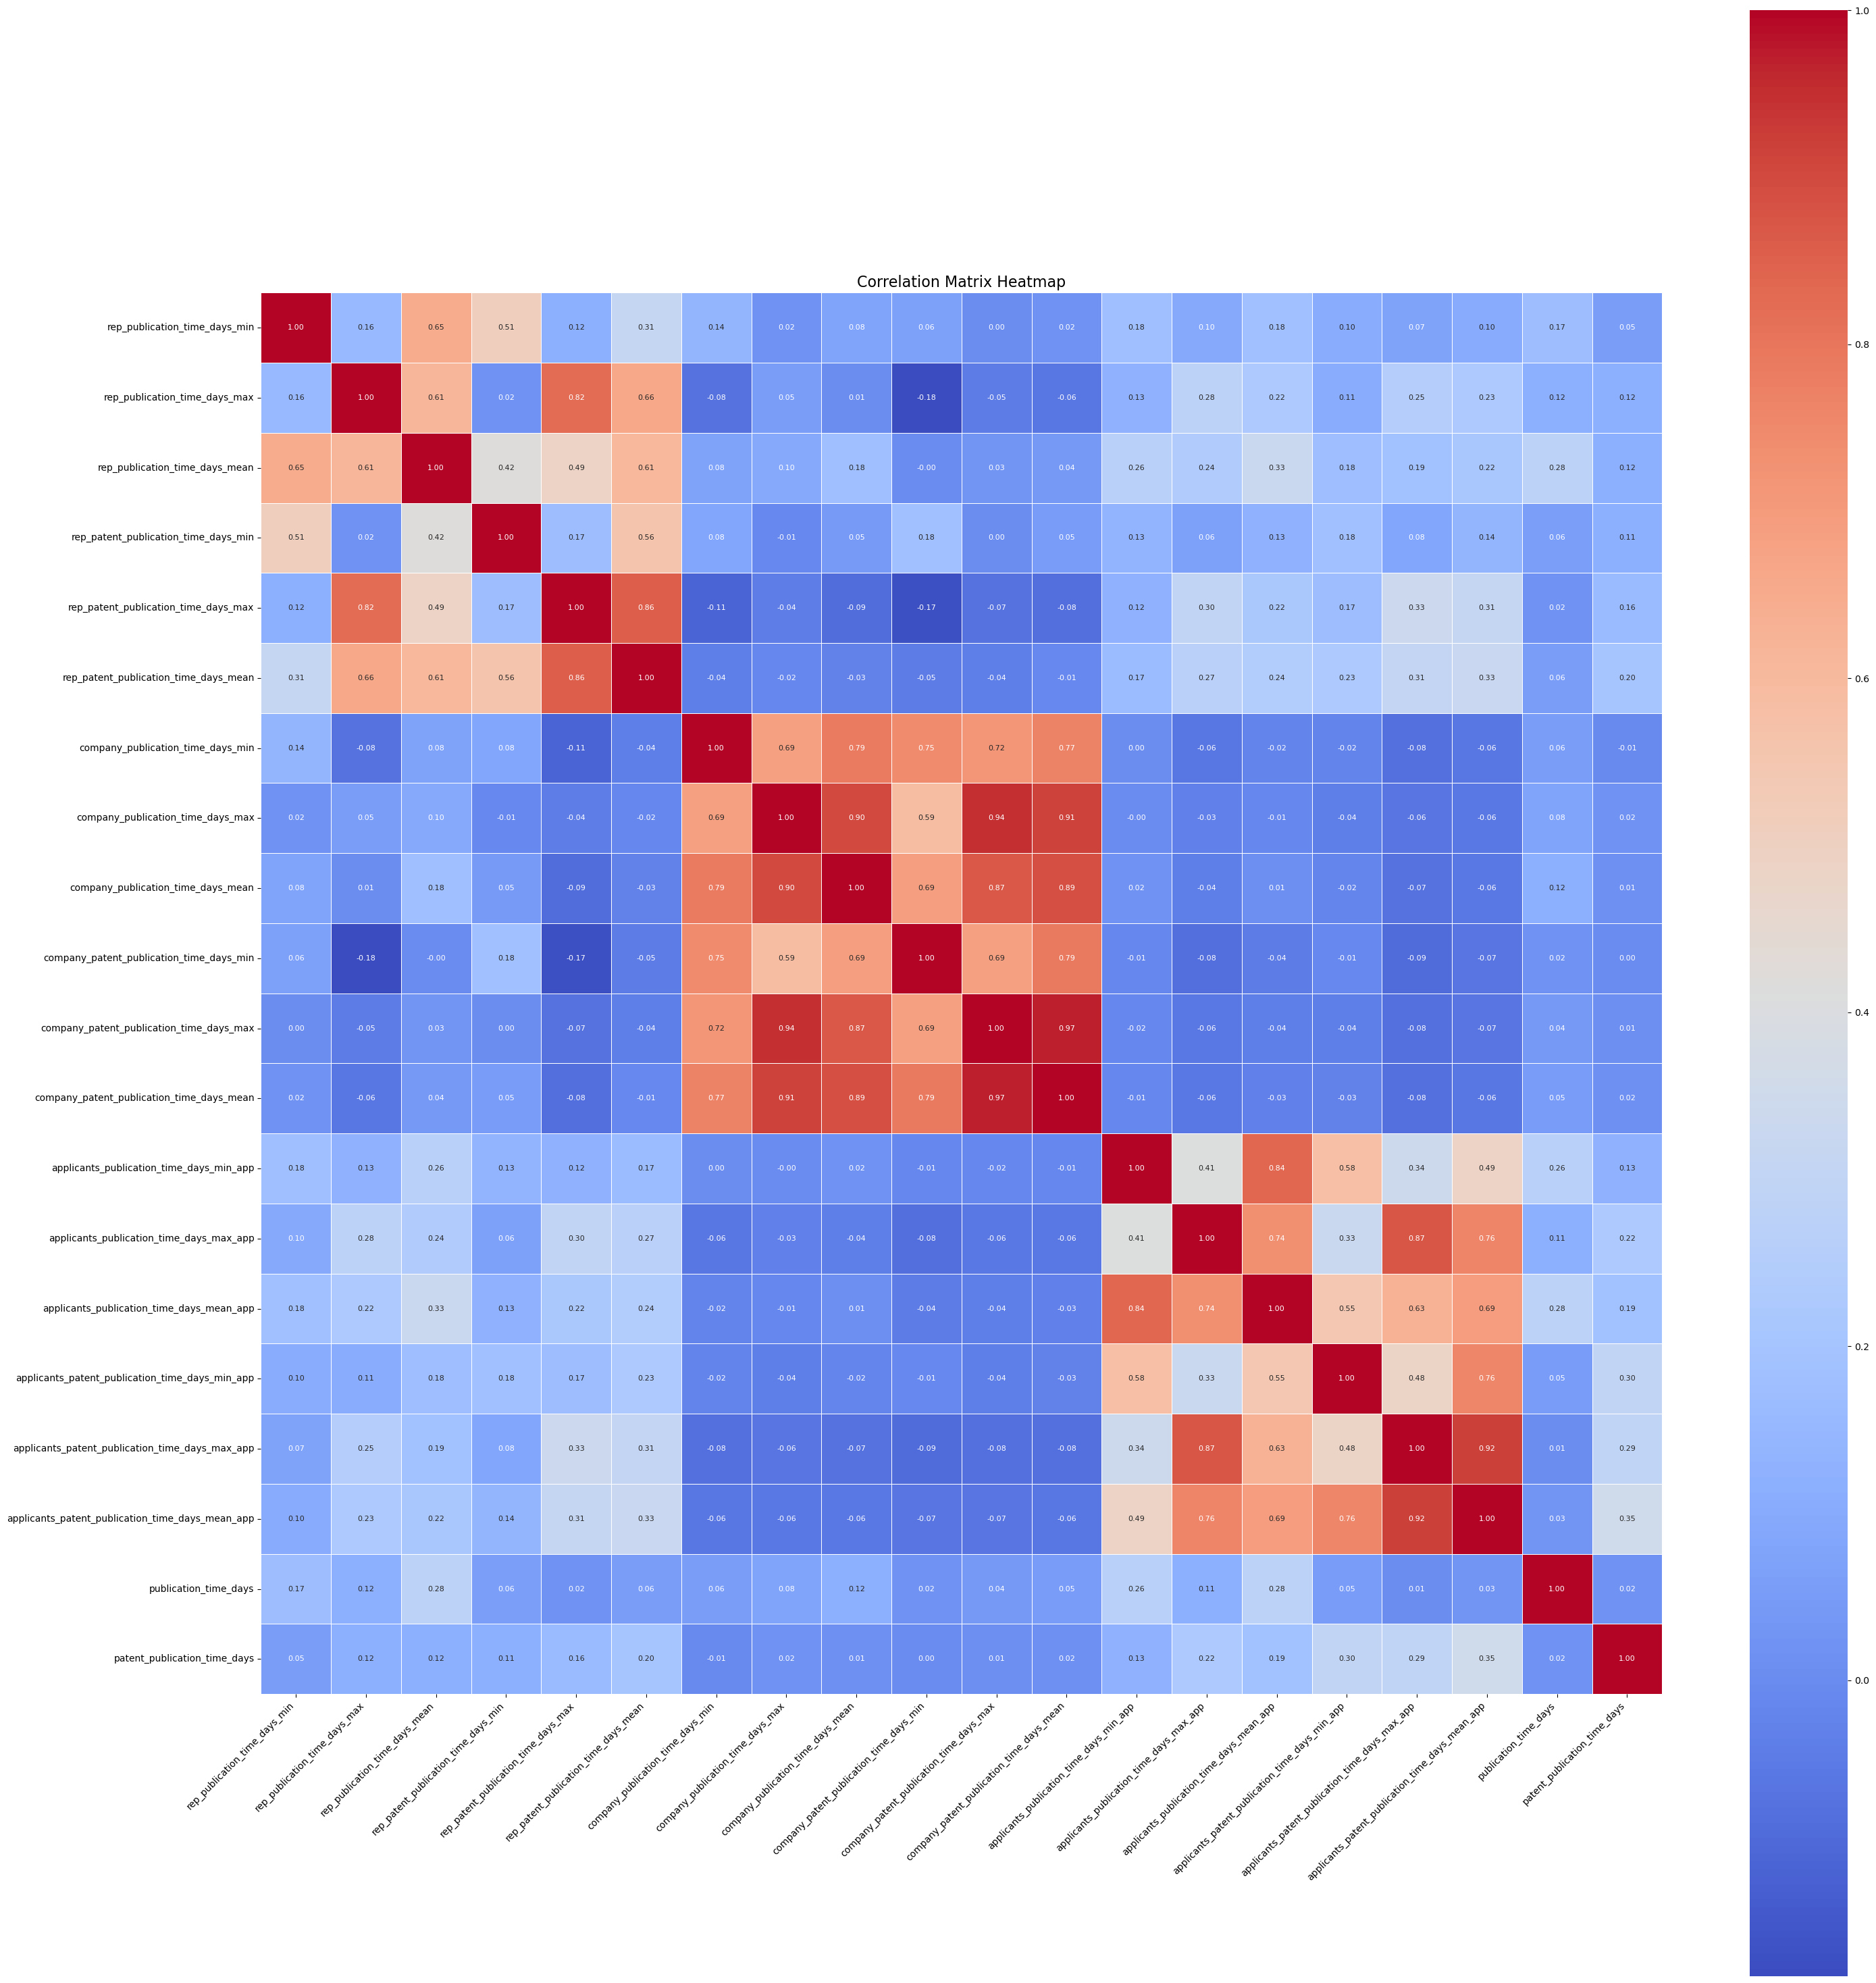

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume your DataFrame is named df
df = joined_reg_sum_example.copy()
df.drop(columns = ['application_number'],inplace=True)
# 1️⃣ Compute the correlation matrix
corr_matrix = df.corr()

# 2️⃣ Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# 3️⃣ Draw the heatmap with Seaborn
sns.heatmap(
    corr_matrix,
    fmt=".2f",            # format to 2 decimal places
    cmap="coolwarm",      # color palette
    cbar=True,            # show color bar
    square=True,          # square cells
    linewidths=.5,        # lines between squares
    annot=True,
    annot_kws={"size": 8} # font size for annotations
)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Regression model testing

In [116]:
df_derived

,application_number,publication_time_days,patent_publication_time_days
0,1000269.9,4151,1925
2,1104117.5,4543,560
7,1203797.4,5077,644
12,2020654.6,3680,2583
16,2291638.1,5133,952
...,...,...,...
747850,24182508.2,4794,147
749884,24186264.8,628,210
751534,24189266.0,5734,105
753911,24193623.6,5026,161


In [115]:
# ------------------------------------------------------------
#  regression-by-cutoff helper
# ------------------------------------------------------------
from pathlib import Path
from typing import Iterable, Dict, List

import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

PARTIES_DIR = Path("./Data/regression_parties_summary")   # same as before

def train_regression_for_cutoffs(
    df_derived: pd.DataFrame,
    cutoffs: Iterable[int],
    target: str = "patent_publication_time_days",
    feature_dir: Path = PARTIES_DIR,
    xgb_params: Dict = None,
) -> pd.DataFrame:
    """
    For every *cutoff* year:
      1. Load parties_time_features_cutoff_<year>.csv
      2. Merge on application_number
      3. Train XGBRegressor on rows with publication_date.year < cutoff
         and evaluate on rows ≥ cutoff
      4. Collect MSE (train & test) and basic set sizes

    Returns a dataframe with one row per cutoff_year.
    """
    if xgb_params is None:
        xgb_params = dict(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=-1,
        )

    # ensure publication_date is datetime once
    df_derived = df_derived.copy()
    if df_derived["publication_date"].dtype != "datetime64[ns]":
        df_derived["publication_date"] = pd.to_datetime(
            df_derived["publication_date"], errors="coerce"
        )

    results: List[Dict] = []

    for yr in cutoffs:
        feat_path = feature_dir / f"parties_time_features_cutoff_{yr}.csv"
        if not feat_path.exists():
            raise FileNotFoundError(f"feature file missing → {feat_path}")

        feats = pd.read_csv(feat_path)

        # -----  merge  -----------------------------------------------------
        data = (
            df_derived.merge(feats, on="application_number", how="inner")
                      .dropna(subset=[target])          # keep only rows w/ target
        )

        # -----  split  -----------------------------------------------------
        # -----  split  -----------------------------------------------------
        train_mask = data["publication_date"].dt.year <= yr    #  <=  instead of <
        test_mask  = data["publication_date"].dt.year  > yr     #  >  instead of ~train_mask


        feature_cols = feats.columns.difference(["application_number"])
        X_train, y_train = data.loc[train_mask, feature_cols], data.loc[train_mask, target]
        X_test,  y_test  = data.loc[test_mask,  feature_cols], data.loc[test_mask,  target]

        if X_test.empty or X_train.empty:
            print(f"⚠️  cutoff {yr}: train or test split empty — skipped")
            continue

        # -----  fit & predict  --------------------------------------------
        model = XGBRegressor(**xgb_params)
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test  = model.predict(X_test)

        results.append(
            dict(
                cutoff_year = yr,
                train_size  = len(y_train),
                test_size   = len(y_test),
                mse_train   = mean_squared_error(y_train, y_pred_train),
                mse_test    = mean_squared_error(y_test,  y_pred_test),
            )
        )

        print(
            f"✓ {yr}:  train MSE={results[-1]['mse_train']:.1f}  |  "
            f"test MSE={results[-1]['mse_test']:.1f}  "
            f"(train={len(y_train)}, test={len(y_test)})"
        )

    return pd.DataFrame(results)


In [118]:
# choose your cut-off window
cutoff_years = range(2015, 2020)

mse_table = train_regression_for_cutoffs(
    df_derived=df_derived,
    cutoffs=cutoff_years,
)

print("\n=== summary ===")
print(mse_table)


✓ 2015:  train MSE=291018.9  |  test MSE=540599.6  (train=78239, test=289844)
✓ 2016:  train MSE=284645.0  |  test MSE=506481.4  (train=113555, test=254528)
✓ 2017:  train MSE=278684.3  |  test MSE=533063.1  (train=151669, test=216414)
✓ 2018:  train MSE=270748.8  |  test MSE=374239.6  (train=192252, test=175831)
✓ 2019:  train MSE=262307.1  |  test MSE=312935.2  (train=231177, test=136906)

=== summary ===
   cutoff_year  train_size  test_size     mse_train      mse_test
0         2015       78239     289844  291018.90625  540599.62500
1         2016      113555     254528  284644.96875  506481.43750
2         2017      151669     216414  278684.28125  533063.12500
3         2018      192252     175831  270748.84375  374239.59375
4         2019      231177     136906  262307.12500  312935.21875
